In [3]:
import numpy.linalg as npl
import numpy as np
import matplotlib.pyplot as plt
from timeit import Timer
from sympy import *
from sympy import symbols, Matrix
from IPython.display import display, Math
import sympy as sym
init_printing()

In [4]:
from Methods.methods import jacobi, sor, gauss_seidel, gauss, comp_w, error
from Helper.help_functions import characteristics, isDDM,  runntime_compare_df, print_lgs
from Helper.create_lgs import create_block_triag, band_matrix, create_upper_triangular

In [5]:
A,b= create_upper_triangular(n=10, dens=0.25)
A

array([[ 2.3785891 ,  0.        ,  0.        , -0.08734999, -0.57765044,
         0.        ,  0.        ,  0.        ,  0.        , -0.71358867],
       [ 0.        ,  3.53295461,  1.00233497,  0.        ,  0.        ,
         0.        ,  1.53061964,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  3.01231722,  0.        ,
         0.2987757 ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         3.75828983,  0.        , -1.41244091,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  7.7073761 ,  2.2259983 

In [14]:
mat, jac_it, gasei_it, sor_it, gael_it = [],[],[],[],[]
jac_time, gasei_time, sor_time_arr, gael_time = [],[],[],[]
jac_error, gasei_error, sor_error, gael_error = [],[],[],[]

normen = [None, 'inf', 0, 1, 2]  # 2-Norm, Maximumsnorm, sum(x!=0), 1-Norm

max_iter = 10000000
range = [20,50,100]

In [15]:
for n in range:
    #A,b  = create_block_triag(n)
    #A, b = band_matrix(n=n)
    A,b = create_upper_triangular(n=n)
    print(f"Run: {n}")
    w = comp_w(A) # 1.25
    true_sol = npl.solve(A, b)
    jac_erg, k_jacobi = jacobi(A,b, iter=max_iter)
    t_j = Timer(lambda:jacobi(A,b, iter=max_iter))
    gauss_seidel_erg, k_gauss_seidel = gauss_seidel(A, b, iter=max_iter)
    gs_t = Timer(lambda:gauss_seidel(A,b, iter=max_iter))
    sor_erg, k_sor = sor(A, b,w, iter=max_iter)
    sor_t = Timer(lambda:sor(A,b,w, iter=max_iter))
    gauss_elim_erg, c = gauss(A=A,B=b)
    t_ge = Timer(lambda:gauss(A,b))
    # iteration
    mat.append(n)
    jac_it.append(k_jacobi)
    gasei_it.append(k_gauss_seidel)
    sor_it.append(k_sor)
    gael_it.append(c)
    # error
    jac_error.append(error(jac_erg, true_sol))
    gasei_error.append(error(gauss_seidel_erg, true_sol))
    sor_error.append(error(sor_erg, true_sol))
    gael_error.append(error(gauss_elim_erg, true_sol))
    # timer
    jac_time.append("{:.3E}".format((t_j.timeit(1))))
    gasei_time.append("{:.3E}".format((gs_t.timeit(1))))
    sor_time_arr.append("{:.3E}".format((sor_t.timeit(1))))
    gael_time.append("{:.3E}".format((t_ge.timeit(1))))

Run: 20
Spektralradius der Jacobi-Matrix: 0.5988236359973128
omega = 1.1105675974218931
Run: 50
Spektralradius der Jacobi-Matrix: 0.44917614041037973
omega = 1.0562767208585764
Run: 100
Spektralradius der Jacobi-Matrix: 0.39060938512252036
omega = 1.0413648222214247


In [16]:
df = runntime_compare_df(mat, jac_it, gasei_it, sor_it, gael_it,jac_time, gasei_time, sor_time_arr, gael_time)

In [17]:
df

Jacobi            Gauß Seidel                    SOR  \
            Iterationen Zeit (sek) Iterationen Zeit (sek) Iterationen   
Matrixgröße                                                             
20                    5  4.739E-04           5  5.222E-04          13   
50                   17  3.029E-03           9  1.505E-03          12   
100                  12  3.457E-03           9  2.151E-03          11   

                       Gauß Eliminierung             
            Zeit (sek)       Iterationen Zeit (sek)  
Matrixgröße                                          
20           2.660E-03               190  6.589E-04  
50           1.236E-02              1225  5.924E-03  
100          1.847E-02              4950  2.040E-02

In [18]:
df_error = runntime_compare_df(mat, jac_it, gasei_it, sor_it, gael_it,
                               jac_time=jac_error, gasei_time=gasei_error, sor_time_arr=sor_error, gael_time=gael_error, label="Fehler")

In [19]:
df_error

Jacobi            Gauß Seidel                    SOR  \
            Iterationen     Fehler Iterationen     Fehler Iterationen   
Matrixgröße                                                             
20                    5  5.440E+00           5  8.153E-17          13   
50                   17  8.666E+00           9  2.935E-11          12   
100                  12  2.053E+00           9  1.158E-11          11   

                       Gauß Eliminierung             
                Fehler       Iterationen     Fehler  
Matrixgröße                                          
20           3.574E-11               190  8.327E+00  
50           2.259E-11              1225  6.022E+00  
100          2.232E-11              4950  1.396E+01

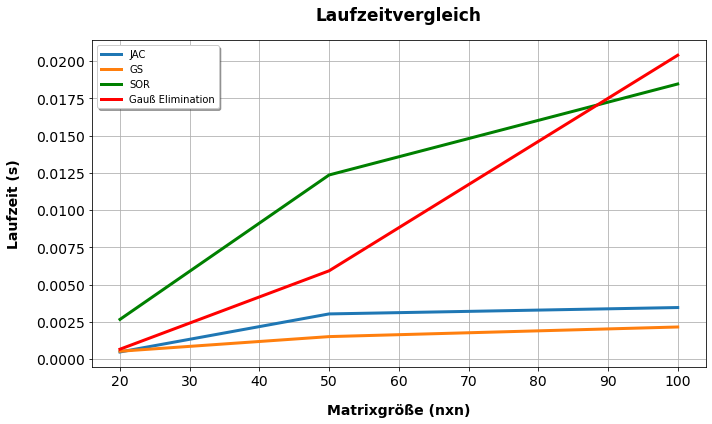

In [20]:
plt.figure(figsize=(10,6))
plt.plot(mat, [float(e)for e in jac_time], label= "JAC",  linewidth=3)
plt.plot(mat, [float(e)  for e in gasei_time], label= "GS",  linewidth=3)
plt.plot( mat, [float(e) for e in sor_time_arr], label= "SOR",  linewidth=3,c="green")
plt.plot( mat, [float(e) for e in gael_time],  label= "Gauß Elimination",  linewidth=3,c="red")

plt.title('Laufzeitvergleich', fontweight='bold', fontsize=17, pad=20)
plt.xticks(rotation='0', fontsize=14)
plt.yticks(rotation='0', fontsize=14)
plt.xlabel('Matrixgröße (nxn)', fontsize=14, labelpad=15, weight ='bold')
plt.ylabel('Laufzeit (s)', fontsize=14, labelpad=15, weight ='bold')
plt.legend(frameon=True,loc='upper left', shadow=True)
plt.tight_layout(h_pad=3.0)
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(mat, [float(e)for e in jac_error], label= "JAC",  linewidth=3)
plt.plot(mat, [float(e)  for e in gasei_error], label= "GS",  linewidth=3)
plt.plot( mat, [float(e) for e in sor_error], label= "SOR",  linewidth=3,c="green")
plt.plot( mat, [float(e) for e in gael_error],  label= "Gauß Elimination",  linewidth=3, c="red")

plt.title('Fehlervergleich', fontweight='bold', fontsize=17, pad=20)
plt.xticks(rotation='0', fontsize=14)
plt.yticks(rotation='0', fontsize=14)
plt.xlabel('Matrixgröße (nxn)', fontsize=14, labelpad=15, weight ='bold')
plt.ylabel('Fehler (10E-6)', fontsize=14, labelpad=15, weight ='bold')
plt.legend(frameon=True,loc='upper left', shadow=True)
plt.tight_layout(h_pad=3.0)
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
w= 20
plt.bar(mat,jac_it, label= "JAC",width = w)
plt.bar(mat, gasei_it, label= "GS",width = w)
plt.bar( mat, sor_it, label= "SOR",width = w)
plt.bar( mat, gael_it,  label= "Gauß Elimination", width = w , color="red")

plt.title('Vergleich Iterationen', fontweight='bold', fontsize=17, pad=20)
plt.xticks(rotation='0', fontsize=14)
plt.yticks(rotation='0', fontsize=14)
plt.xlabel('Matrixgröße (nxn)', fontsize=14, labelpad=15, weight ='bold')
plt.ylabel('Iterationen', fontsize=14, labelpad=15, weight ='bold')
plt.legend(frameon=True,loc='upper left', shadow=True)
plt.grid()
plt.show()

In [ ]:
df_error.plot.bar(figsize=(10,6))
plt.title('Vergleich Iterationen', fontweight='bold', fontsize=17, pad=20)
plt.xticks(rotation='0', fontsize=14)
plt.yticks(rotation='0', fontsize=14)
plt.xlabel('Matrixgröße', fontsize=14, labelpad=15, weight ='bold')
plt.ylabel('Iterationen (10E6)', fontsize=14, labelpad=15, weight ='bold')
plt.legend(frameon=True,loc='best', shadow=True, fontsize="large")
plt.tight_layout(h_pad=3.0)
plt.grid()
plt.show()

In [ ]:
n=20
A,b = create_block_triag(n)
true_sol = npl.solve(A, b)

jac_erg, k_jacobi = jacobi(A,b, iter=max_iter)
gauss_seidel_erg, k_gauss_seidel = gauss_seidel(A, b, iter=max_iter)
sor_erg, k_sor = sor(A, b,w=1, iter=max_iter)
gauss_elim_erg,c = gauss(A,b)

In [ ]:
gs_fehler=np.round(gauss_seidel_erg[len(gauss_seidel_erg)-1]-true_sol,4)
jk_fehler=np.round(jac_erg[len(jac_erg)-1]-true_sol,4)
sor_fehler=np.round(sor_erg[len(sor_erg)-1]-true_sol,4)

jr = Matrix(jk_fehler)
gr = Matrix(gs_fehler)
sr = Matrix(sor_fehler)
display(Math('\ \\text{ Jacobi : }%s   \\text{Gauss-Seidel :} %s \\text{SOR :} %s' % (sym.latex(sym.simplify(jr)) , (sym.latex(sym.simplify(gr))), (sym.latex(sym.simplify(sr)))  ))   )

In [ ]:
dict = {'Jacobi Verfahren': jac_erg,
        'Gauss-Seidel Verfahren': gauss_seidel_erg,
        "SOR Verfahren":sor_erg
        }
#label = [f'x{i}' for i in range(0,n)]
label = [f'x0 - x{n-1} ']

for name,data in dict.items():
    plt.figure(figsize=(9,6))
    plt.plot(data) # linestyle='',marker='.'
    #plt.axvline(x=k_sor+0.5,linestyle='--',c='red')
    plt.title(name, fontweight='bold', fontsize=17, pad=20)
    plt.xticks(rotation='0', fontsize=14)
    plt.yticks(rotation='0', fontsize=14)
    plt.xlabel('Iteration', fontsize=14, labelpad=15, weight ='bold')
    plt.ylabel('Wert', fontsize=14, labelpad=15, weight ='bold')
    plt.legend(labels = label,frameon=True,loc='best', shadow=True, fontsize="large")
    plt.tight_layout(h_pad=3.0)
    plt.grid(True)
    plt.show()